In [23]:
#ensemble

In [24]:
from lstm import Lstm

from random_forest import rfModel, getData

from tensorflow.keras.models import load_model
import joblib

import pandas as pd
import numpy as np

In [25]:
ticker = 'SOLUSD'
frq = '1'
target = 'return_8n'
model_date_lstm = '2024-11-02'
model_date_rf = '2024-11-02'


In [26]:
lstm_name = f"{ticker}_{frq}_{target}_{model_date_lstm}"
rf_name = f"{ticker}_{frq}_{target}_{model_date_rf}"
# rf_name = f"{ticker}_{frq}_return_16n_{model_date_rf}"


In [27]:
rf_name

'SOLUSD_1_return_8n_2024-11-02'

In [28]:
rf_path = f"models/random-forest/{rf_name}/{rf_name}.joblib"
lstm_path = f"models/lstm/{lstm_name}.h5"

In [29]:

try:
    lstm_model = load_model(lstm_path)
    print("LSTM model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

try:
    rf_model = joblib.load(rf_path)  # Use joblib for Random Forest
    print("Random Forest model loaded successfully.")
except Exception as e:
    print(f"Error loading Random Forest model: {e}")

Error loading model: [Errno 2] Unable to open file (unable to open file: name = 'models/lstm/SOLUSD_1_return_8n_2024-11-02.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error loading Random Forest model: [Errno 2] No such file or directory: 'models/random-forest/SOLUSD_1_return_8n_2024-11-02/SOLUSD_1_return_8n_2024-11-02.joblib'


In [30]:
silver = pd.read_csv(f"data/silver_prices/{ticker}_{frq}_silver.csv")

silver = silver[-int(len(silver)/2):]

timestamps = silver['timestamp']


In [31]:
df = pd.read_csv(f"data/silver_prices/{ticker}_{frq}_silver.csv")
print(df)
timestamps = list(df['timestamp'])
X_train, y_train, X_test, y_test = getData(df, target)


           timestamp    open    high     low   close       volume  \
0       1.710029e+09  144.54  144.65  144.47  144.47    13.754663   
1       1.710029e+09  144.47  144.47  144.46  144.46    24.090470   
2       1.710029e+09  144.35  144.36  144.25  144.25  1851.069718   
3       1.710029e+09  144.32  144.44  144.25  144.42   351.473471   
4       1.710029e+09  144.40  144.40  144.25  144.25     8.137084   
...              ...     ...     ...     ...     ...          ...   
270467  1.727740e+09  152.48  152.48  152.48  152.48     0.182721   
270468  1.727741e+09  152.49  152.71  152.49  152.71     5.327818   
270469  1.727741e+09  152.67  152.67  152.67  152.67     0.772765   
270470  1.727741e+09  152.67  152.67  152.67  152.67     1.078606   
270471  1.727741e+09  152.66  152.66  152.66  152.66  1247.361446   

                   0           1         2           3  ...  \
0       1.710029e+09         NaN       NaN         NaN  ...   
1       1.710029e+09         NaN       NaN   

In [32]:
lstm = Lstm(silver, ticker, frq, target, timestamps, lstm_name)

rf = rfModel(X_train, y_train, X_test, y_test, ticker, frq, target, timestamps, rf_name)

In [33]:
lstm.setModel(lstm_model)
# rf.setModel(rf_model)

NameError: name 'lstm_model' is not defined

In [ ]:
# rf.results.head()
lstm.getData()

In [ ]:
lstm.predictAndUnscale()

214/214 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step


In [ ]:
# len(lstm.)


# test_timestamps

In [ ]:
lstm.y_pred[:, 0, 0] 

array([0.52579343, 0.5258166 , 0.5260205 , ...,        nan,        nan,
              nan], dtype=float32)

In [ ]:
# rf.X_test.shape

rf_test = rf.X_test[-len(lstm.y_test):]

rf_pred = rf_model.predict(rf_test)

rf_pred = rf_pred[:-7]

In [ ]:
# y_pred_normalized.shape


<h1>CLEANING</h1>

In [ ]:
test = list(lstm.y_test.flatten())[:-7]
pred = list(lstm.y_pred[:, 0, 0].flatten())[:-7]
timestamps = list(lstm.timestamps[-len(lstm.y_test):])[:-7]



t_na = np.isnan(test).sum()
p_na = np.isnan(pred).sum()
tt_na = np.isnan(timestamps).sum()
cut = max((t_na, p_na, tt_na))

test = test[-cut:]
pred = pred[-cut:]
timestamps = timestamps[-cut:]

def z_score_normalization(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std


y_test_normalized = z_score_normalization(test)
y_pred_normalized = z_score_normalization(pred)


#Model is robust to noise, Z-score normalization for visualization

In [ ]:
lstm.y_test.shape

(6837, 1)

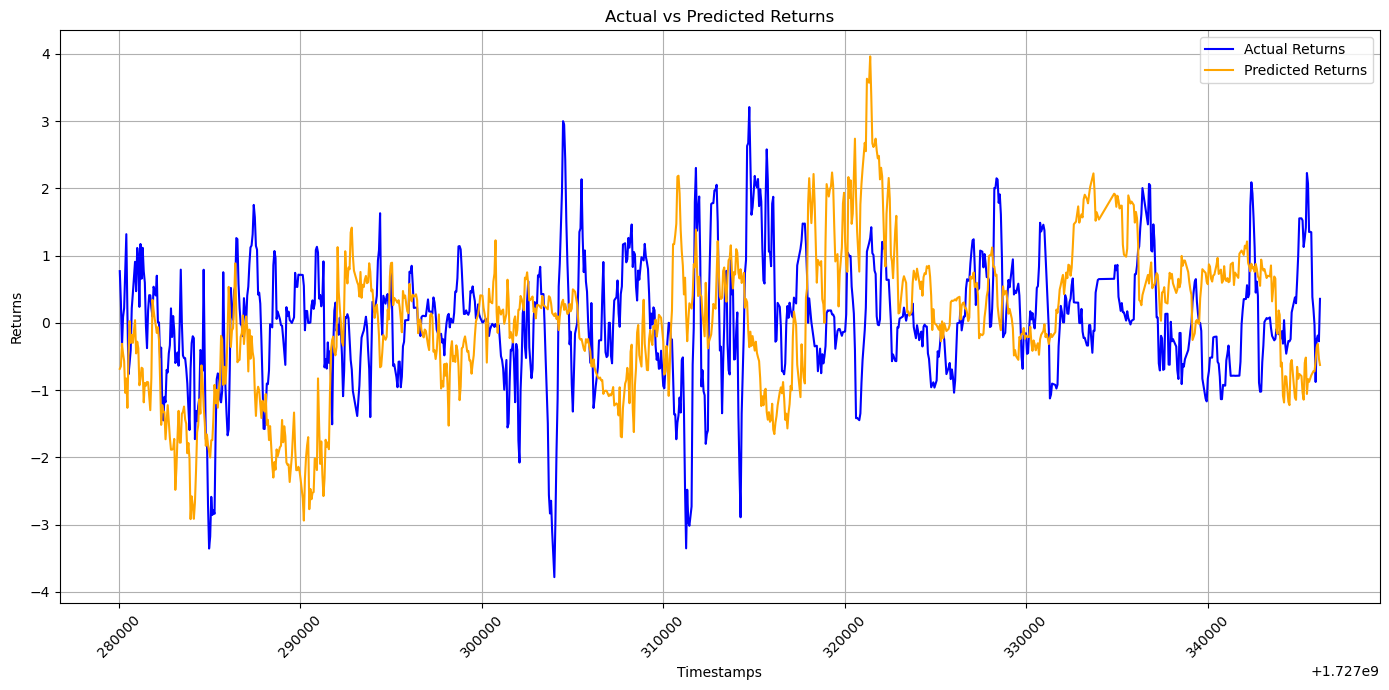

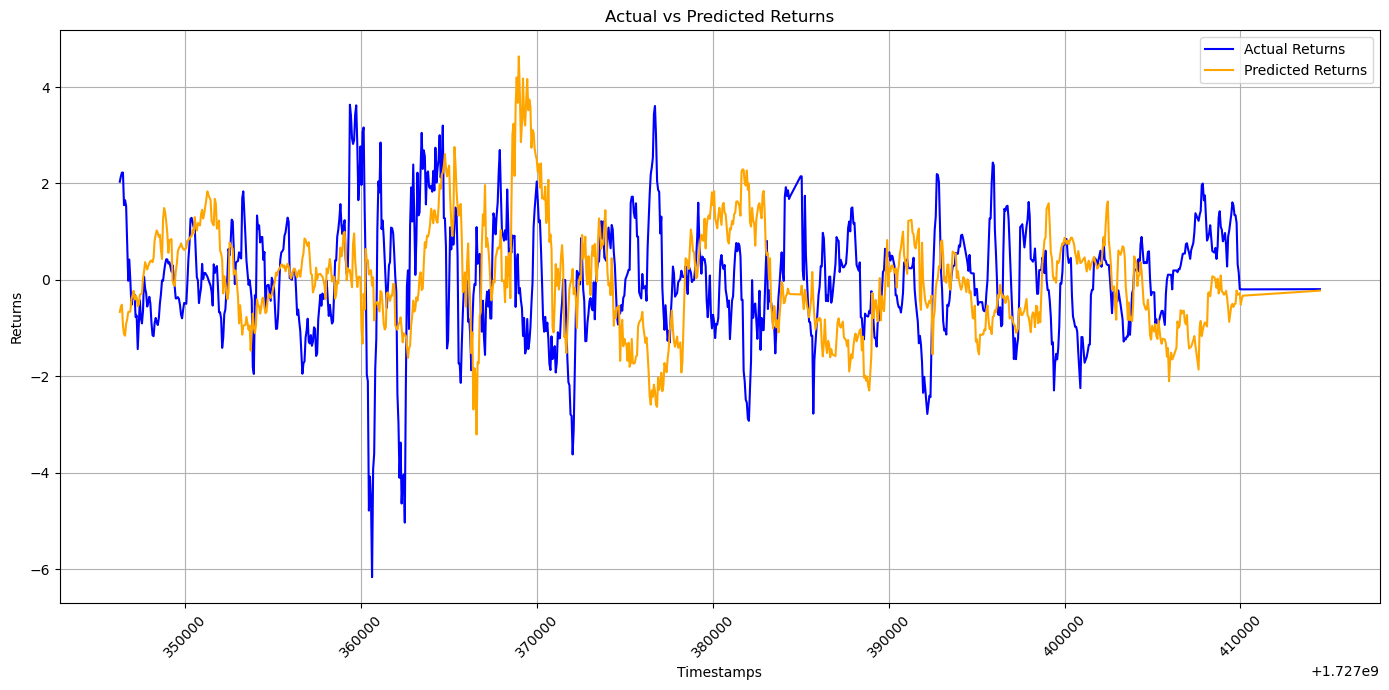

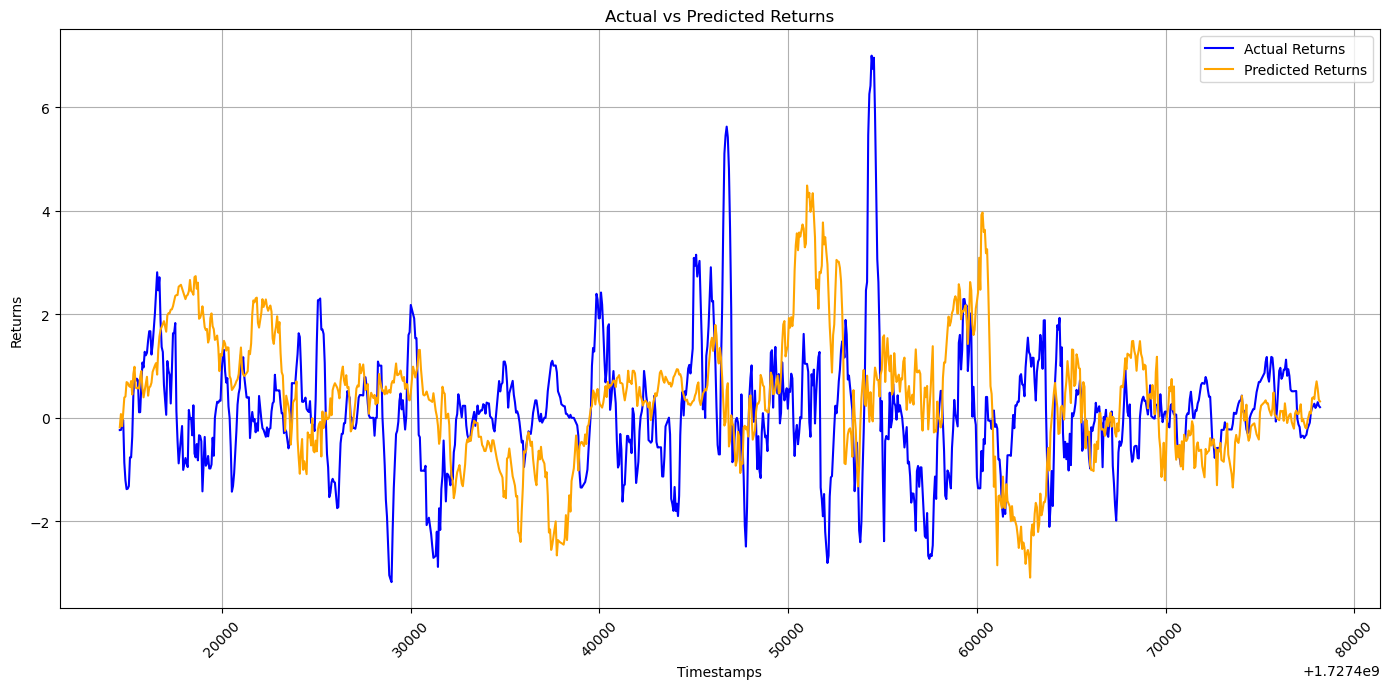

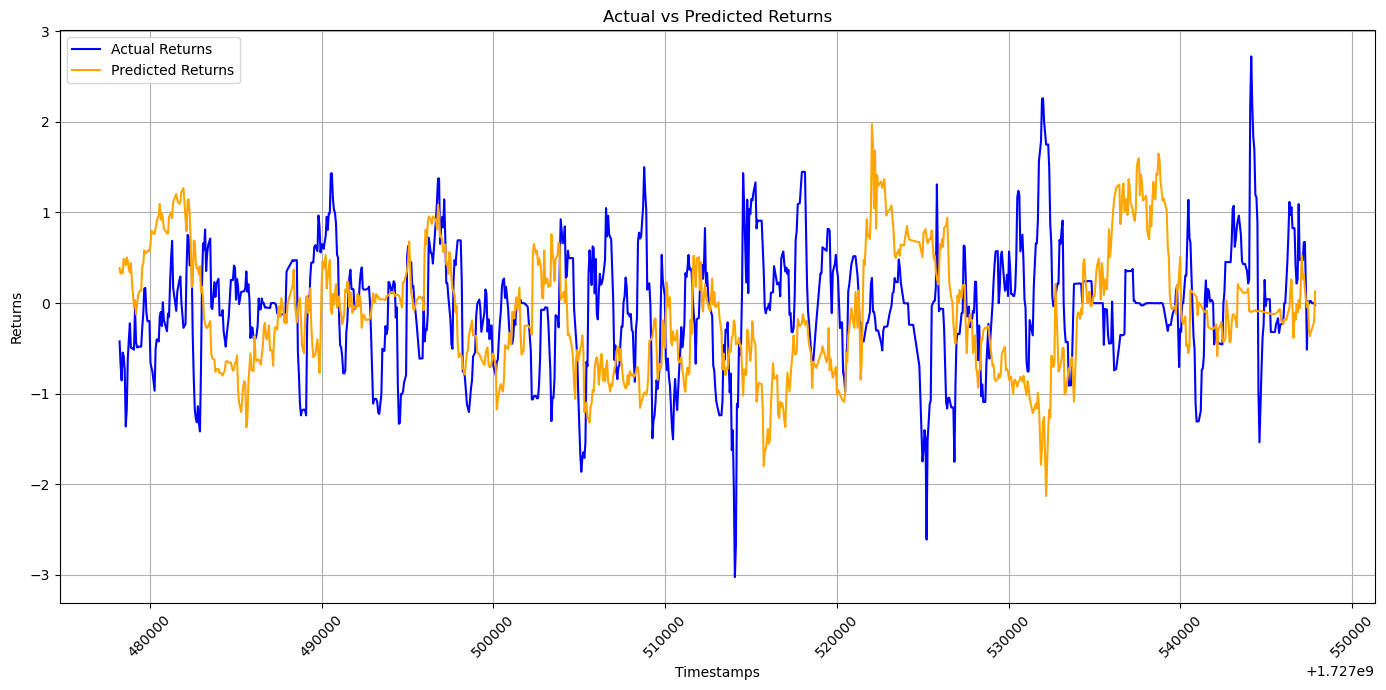

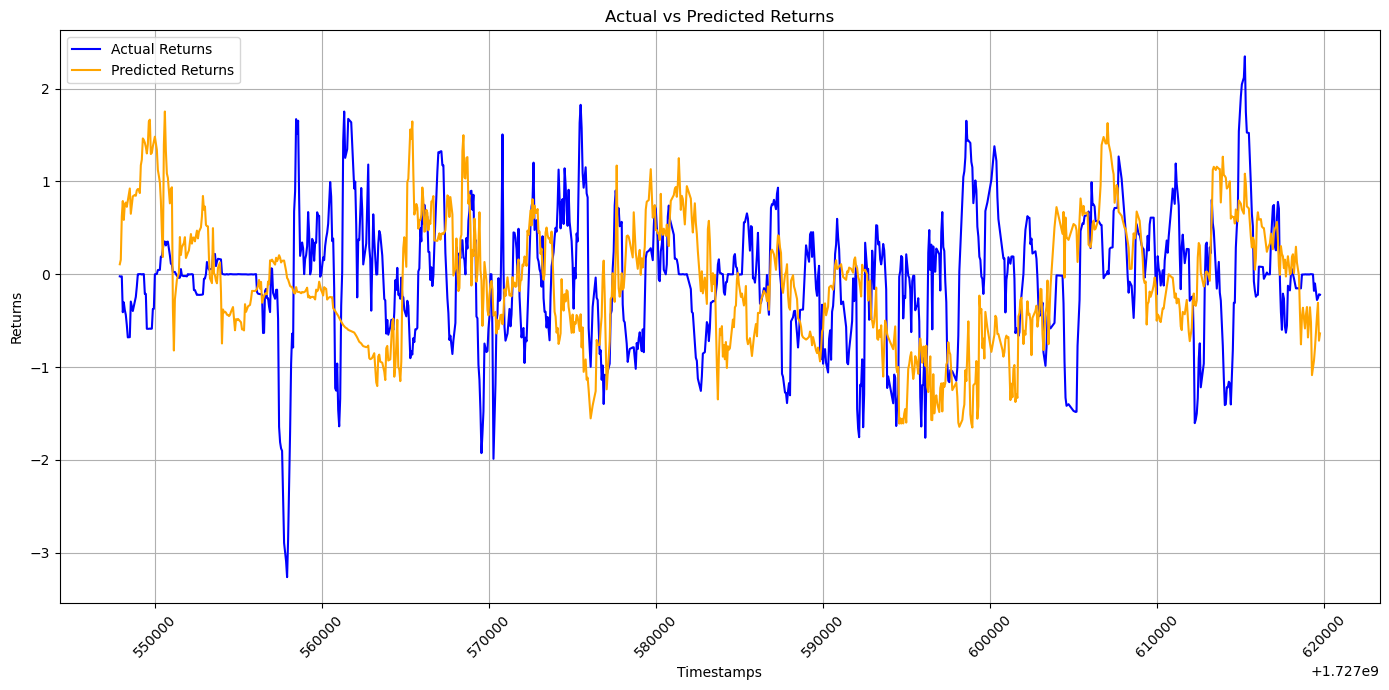

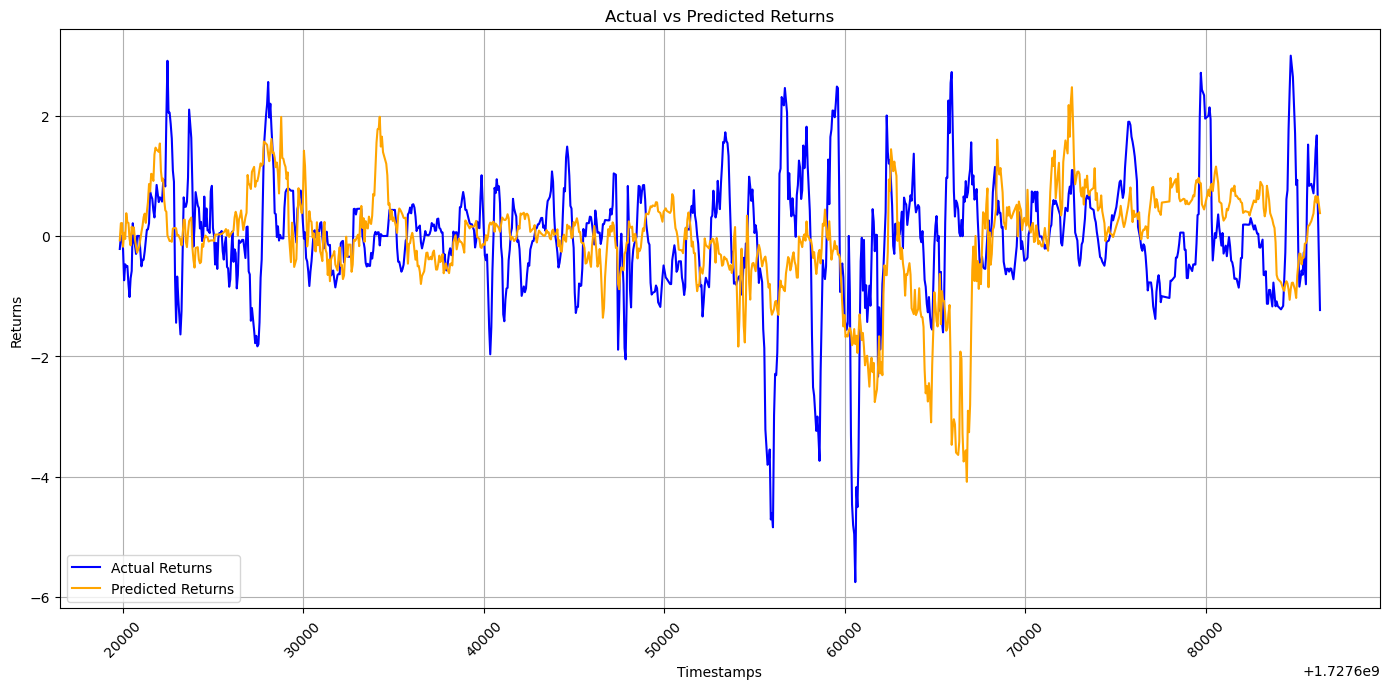

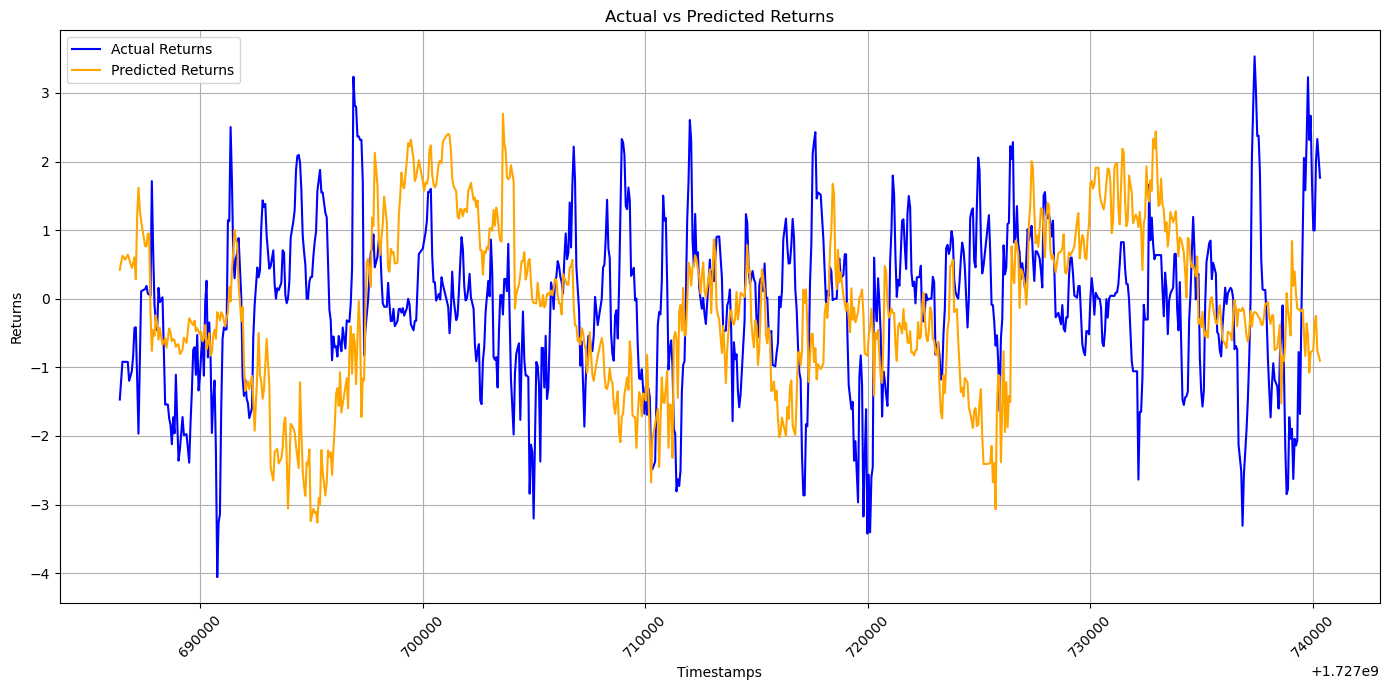

In [ ]:
import matplotlib.pyplot as plt



def visualize_predictions(test_timestamps, y_test, y_pred):
    plt.figure(figsize=(14, 7))
    plt.plot(test_timestamps, y_test, label='Actual Returns', color='blue')
    plt.plot(test_timestamps, y_pred, label='Predicted Returns', color='orange')
    plt.title('Actual vs Predicted Returns')
    plt.xlabel('Timestamps')
    plt.ylabel('Returns')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()



interval_size = 1000 # Example interval size

# Iterate through the arrays in defined intervals
for start in range(0, len(y_pred_normalized), interval_size):
    end = start + interval_size
    # Make sure we do not exceed the array length
    end = min(end, len(y_pred_normalized))
    
    # Get the actual and predicted values for this interval
    actual_values = y_test_normalized[start:end]
    predicted_values = y_pred_normalized[start:end]
    visualize_predictions(timestamps[start:end], y_test_normalized[start:end], y_pred_normalized[start:end])
# Assuming lstm.y_test, lstm.y_pred, and test_timestamps are defined
# visualize_predictions(timestamps[start:end], y_test_normalized[start:end], y_pred_normalized[start:end])


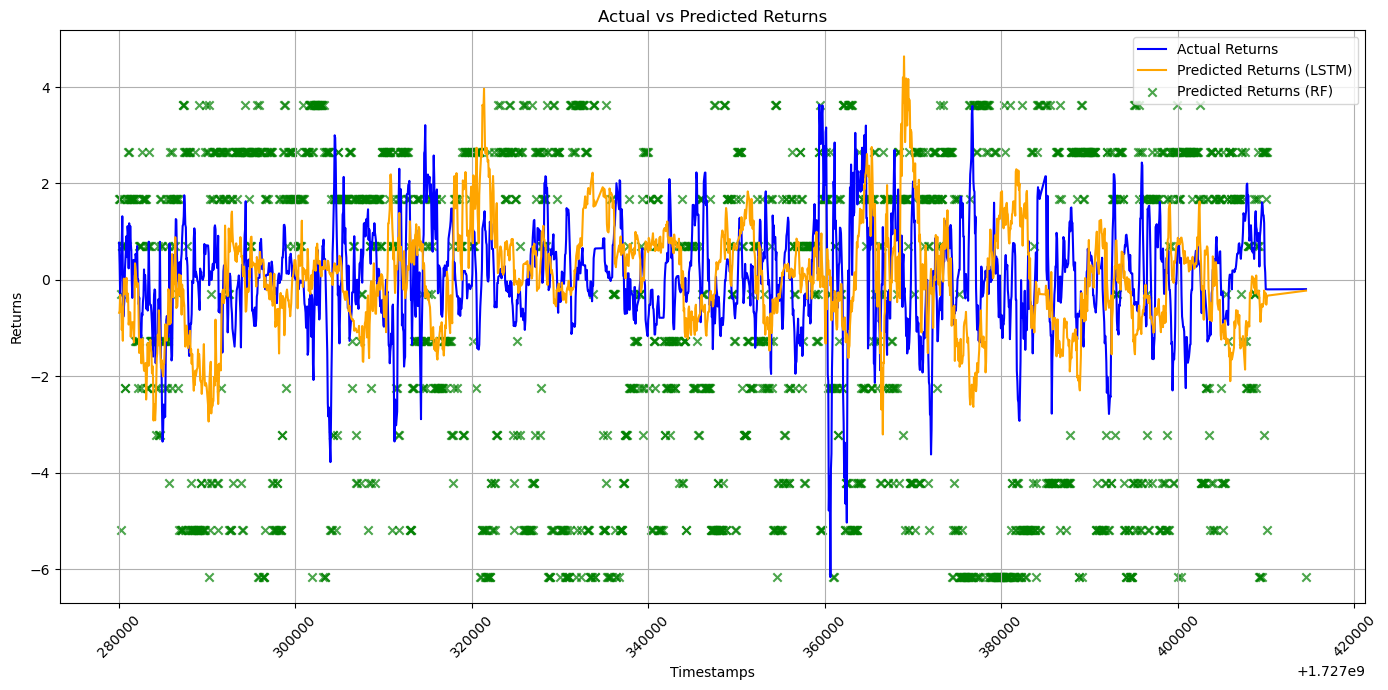

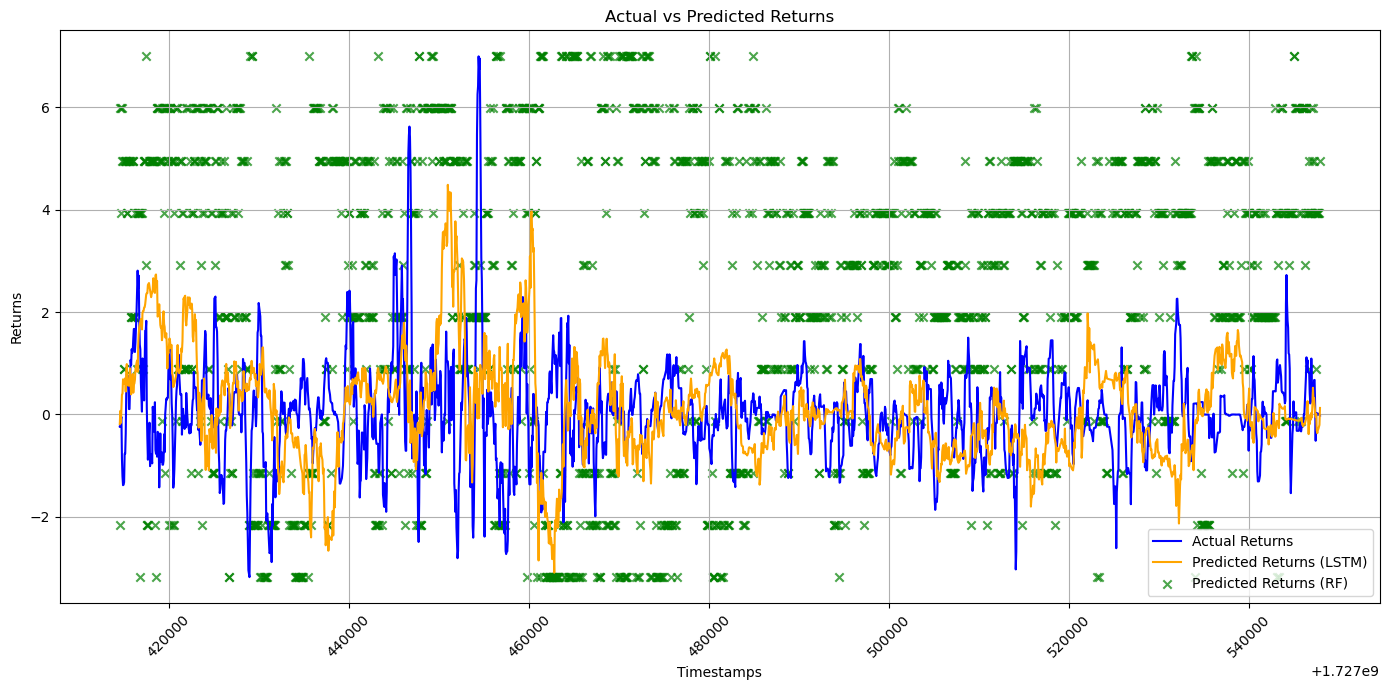

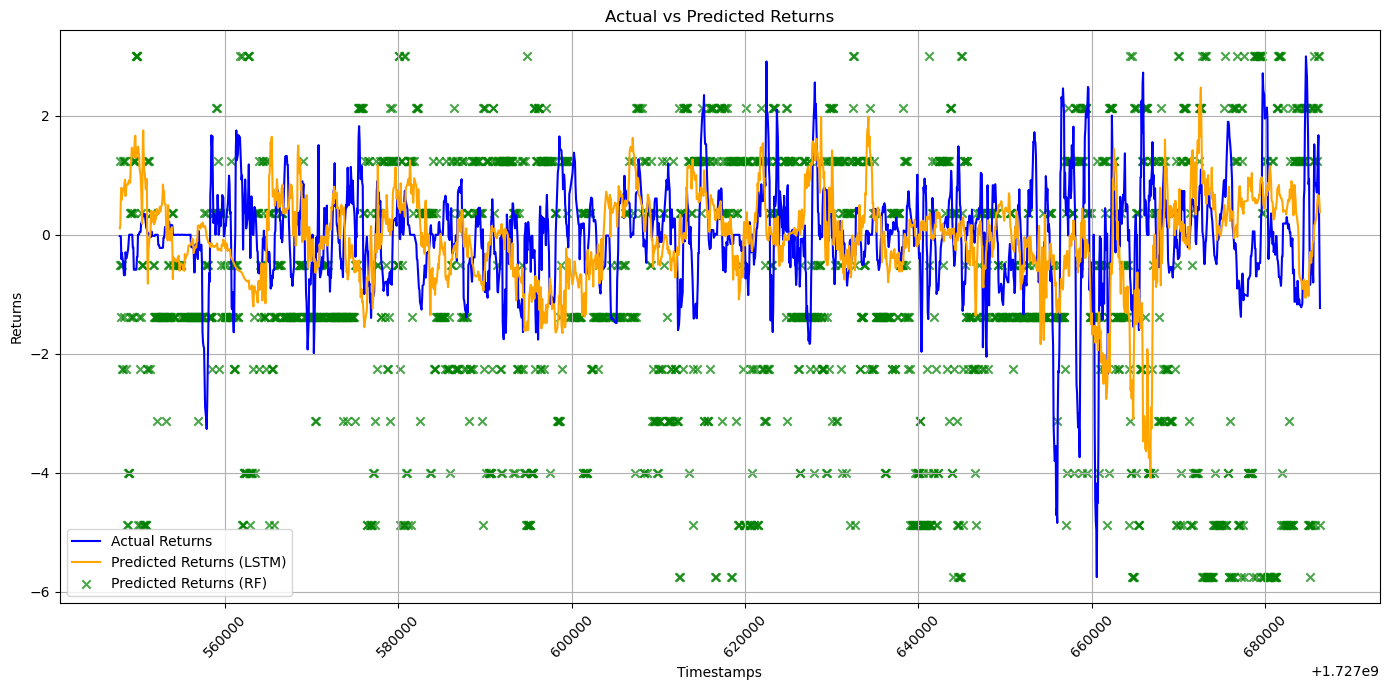

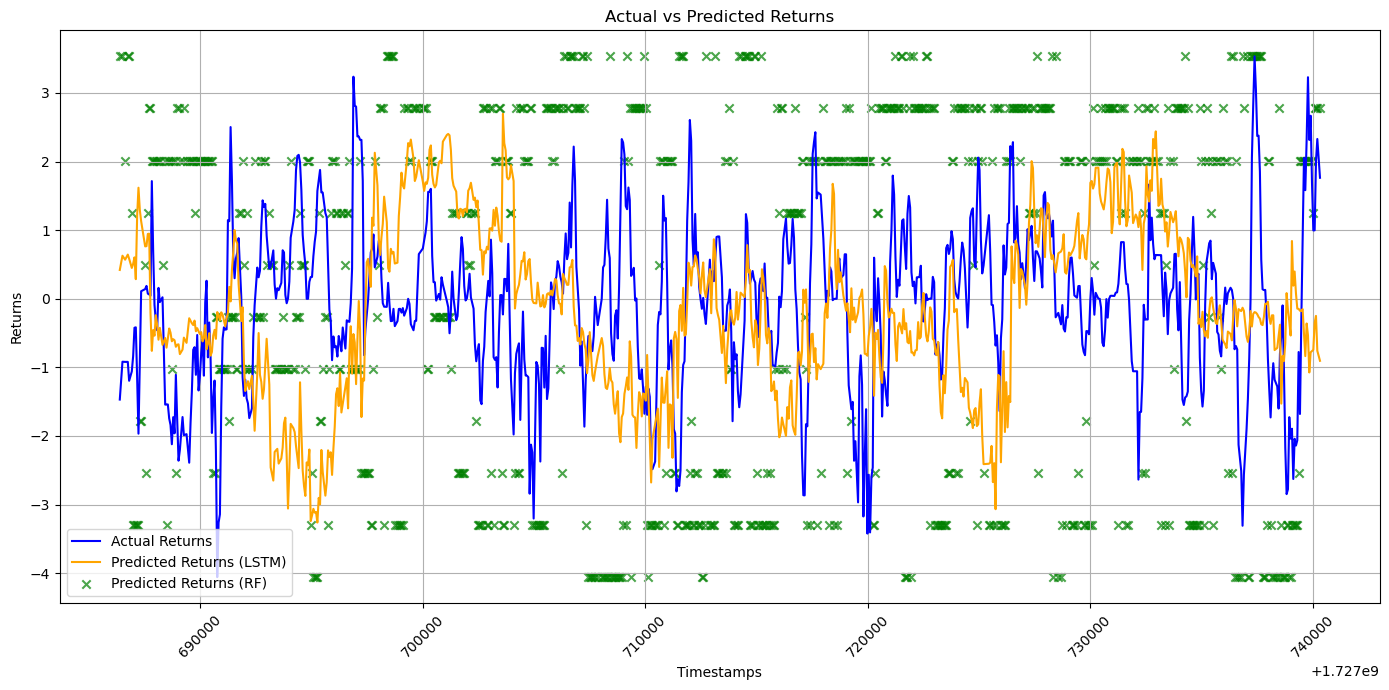

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(test_timestamps, y_test, y_pred, rf_pred):
    # Normalize rf_pred to match the scale of y_test
    rf_pred_normalized = np.interp(rf_pred, (rf_pred.min(), rf_pred.max()), (y_test.min(), y_test.max()))
    
    plt.figure(figsize=(14, 7))
    
    # Plot actual returns
    plt.plot(test_timestamps, y_test, label='Actual Returns', color='blue')
    # Plot LSTM predicted returns
    plt.plot(test_timestamps, y_pred, label='Predicted Returns (LSTM)', color='orange')
    # Plot normalized Random Forest predictions as discrete points
    plt.scatter(test_timestamps, rf_pred_normalized, label='Predicted Returns (RF)', color='green', marker='x', alpha=0.7)
    
    plt.title('Actual vs Predicted Returns')
    plt.xlabel('Timestamps')
    plt.ylabel('Returns')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

interval_size = 2000  # Example interval size

# Iterate through the arrays in defined intervals
for start in range(0, len(y_pred_normalized), interval_size):
    end = start + interval_size
    # Ensure we do not exceed the array length
    end = min(end, len(y_pred_normalized))
    
    # Get the actual and predicted values for this interval
    actual_values = y_test_normalized[start:end]
    predicted_values = y_pred_normalized[start:end]
    rf_predictions = rf_pred[start:end]  # Assuming rf_pred is already defined

    visualize_predictions(timestamps[start:end], actual_values, predicted_values, rf_predictions)


In [ ]:
def generate_signals(rf_pred, lstm_pred, time):
    signals = []
    for i in range(len(rf_pred)):
        if lstm_pred[i] >= 1.5:
            signal = 1
        elif lstm_pred[i] <= -1.5:
            signal = -1
        else:
            signal = 0

        signals.append((time[i], signal))
    return signals


signals = pd.DataFrame(generate_signals(rf_pred, y_pred_normalized, timestamps))
signals

,0,1
0,1.727280e+09,0
1,1.727280e+09,0
2,1.727280e+09,0
3,1.727280e+09,0
4,1.727280e+09,0
...,...,...
6825,1.727740e+09,0
6826,1.727740e+09,0
6827,1.727740e+09,0
6828,1.727740e+09,0


In [ ]:
len(rf_pred)

6830

In [ ]:
df = silver.merge(signals, left_on="timestamp", right_on=0)
df

,timestamp,open,high,low,close,volume,0,1,2,3,...,hilberttransformtrendmode_1,return_2n,return_4n,return_8n,return_16n,return_32n,return_64n,return_256n,0,1
0,1.727280e+09,2599.99,2602.00,2599.99,2602.00,146.612001,1.727280e+09,2616.706748,2606.7510,2596.795252,...,1.0,-0.000922,-0.002433,0.000550,-0.000480,0.000257,-0.001587,-0.010473,1.727280e+09,0
1,1.727280e+09,2602.00,2602.99,2602.00,2602.07,2.951730,1.727280e+09,2615.644889,2606.1365,2596.628111,...,1.0,-0.001556,-0.003051,-0.000603,-0.001303,0.001422,-0.001679,-0.009888,1.727280e+09,0
2,1.727280e+09,2600.77,2601.74,2599.60,2599.60,2.222962,1.727280e+09,2614.265069,2605.3490,2596.432931,...,1.0,-0.001512,-0.000077,0.000154,0.000535,0.002373,-0.000731,-0.008948,1.727280e+09,0
3,1.727280e+09,2598.07,2598.07,2598.02,2598.02,4.024880,1.727280e+09,2613.219773,2604.5770,2595.934227,...,1.0,-0.001497,0.002086,0.000381,0.001139,0.003449,-0.000127,-0.008341,1.727280e+09,0
4,1.727280e+09,2598.26,2598.26,2595.67,2595.67,3.153943,1.727280e+09,2612.440999,2603.7425,2595.044001,...,1.0,0.001437,0.002990,0.001306,0.002870,0.004357,0.000512,-0.007439,1.727280e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,1.727740e+09,2596.54,2596.54,2596.54,2596.54,0.009076,1.727740e+09,2602.452767,2591.2665,2580.080233,...,1.0,-0.001321,-0.000127,0.001714,NaN,NaN,NaN,NaN,1.727740e+09,0
6826,1.727740e+09,2594.00,2594.68,2592.89,2593.00,3.189541,1.727740e+09,2601.495803,2590.9375,2580.379197,...,1.0,0.000814,0.001253,0.003444,NaN,NaN,NaN,NaN,1.727740e+09,0
6827,1.727740e+09,2593.63,2593.63,2593.01,2593.11,1.234956,1.727740e+09,2600.234382,2590.5665,2580.898618,...,1.0,0.001195,0.001697,0.003999,NaN,NaN,NaN,NaN,1.727740e+09,0
6828,1.727740e+09,2593.11,2595.15,2593.11,2595.11,0.833366,1.727740e+09,2599.622035,2590.3995,2581.176965,...,1.0,0.000439,0.001164,0.003029,NaN,NaN,NaN,NaN,1.727740e+09,0


In [ ]:
len(rf_pred
)

6830

In [ ]:
rf_pred.min()

1.0

In [ ]:
y_pred_normalized

array([-0.6829937, -0.6449899, -0.3107714, ..., -0.2503952, -0.7592944,
       -0.9049593], dtype=float32)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation
# df = pd.DataFrame({
#     'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='D'),
#     'close': np.random.rand(100) * 100,
#     'signal': np.random.choice([1, 0, -1], size=100)
# })

# Ensure your timestamp column is a datetime type
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df.set_index('timestamp', inplace=True)

# # Create a figure and axis
# plt.figure(figsize=(14, 7))

# # Plot 'close' price
# plt.plot(df.index, df['close'], label='Close Price', color='blue')

# # Plot signals
# buy_signals = df[df[1] == 1]
# sell_signals = df[df[1] == -1]

# plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='green', label='Buy Signal', s=100)
# plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='red', label='Sell Signal', s=100)

# # Add labels and title
# plt.title('Close Price with Buy/Sell Signals')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid()

# # Show the plot
# plt.show()

# Ensure your timestamp column is a datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Define the interval size (number of timestamps per chunk)
interval_size = 10

# Create the figure
plt.figure(figsize=(14, 7))

# Iterate through the DataFrame in intervals
for start in range(0, len(df), interval_size):
    end = min(start + interval_size, len(df))
    chunk = df.iloc[start:end]

    # Plot 'close' price for the current chunk
    plt.plot(chunk.index, chunk['close'], label='Close Price', color='blue', alpha=0.5)

    # Plot signals
    buy_signals = chunk[chunk['signal'] == 1]
    sell_signals = chunk[chunk['signal'] == -1]

    plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='green', label='Buy Signal', s=100)
    plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='red', label='Sell Signal', s=100)

# Add labels and title
plt.title('Close Price with Buy/Sell Signals in Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

KeyError: 'timestamp'

<h1>RANDOM FOREST</h1>

rf = tfModel()